In [1]:
import numpy as np 
import pandas as pd
from collections import defaultdict 
import matplotlib.pyplot as plt
import matplotlib 
from scipy.stats import t, f
from sklearn.linear_model import LinearRegression
import scipy as sc

font = {'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

rng = np.random.default_rng(seed=12)

import pyoperon

In [55]:
df = pd.read_csv("grade.csv")
xcols = ['ETA_mean'] #, 'hoursWork_mean', 'numAttendence_max', 'age', 'numChildren', 'enrollmentTime', 'isSingle']

smpls = 500
x, y = df[xcols].values[:smpls], df.grade.values[:smpls]
#x = np.concatenate((np.ones((x.shape[0],1)),x), axis=1)

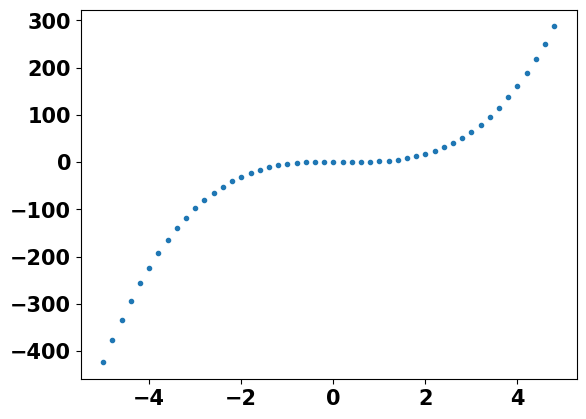

In [3]:
x = np.arange(-5, 5, 0.2)
y = rng.normal( 3*x**3 - 2*x**2 + 0.1*x + 1, 0.2)
plt.plot(x, y, '.')

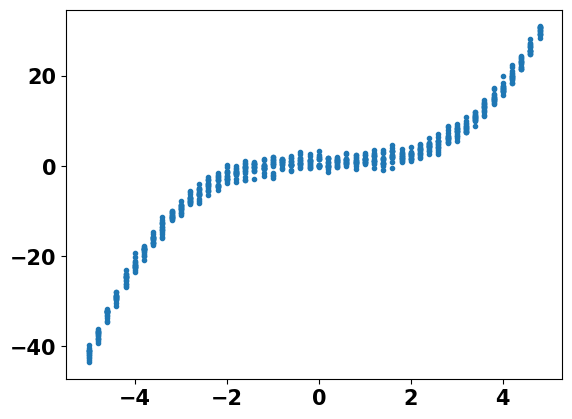

In [4]:
x = np.repeat(np.arange(-5, 5, 0.2), 15)
y = rng.normal( 0.3*x**3 - 0.2*x**2 + 0.1*x + 1, 1)
plt.plot(x, y, '.')

/home/olivetti/.local/pyenv/lib/python3.11/site-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


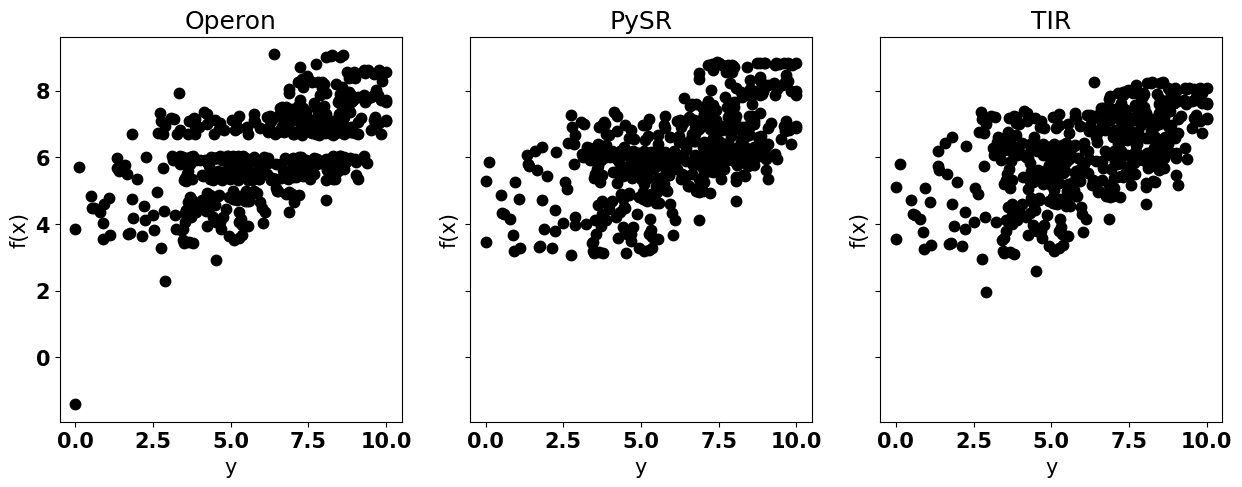

In [56]:
from pyoperon.sklearn import SymbolicRegressor
from sklearn.linear_model import LinearRegression
import sympy as sym
from sympy import Number 
from pyTIR import TIRRegressor
from pysr import PySRRegressor

def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

reg1 = SymbolicRegressor()
reg1.fit(x.reshape(-1,1),y)

reg2 = TIRRegressor(100, 100, 0.3, 0.7, (-3, 3), transfunctions='Id', alg='MOO')
reg2.fit(x.reshape(-1,1), y)

reg3 = PySRRegressor(binary_operators=["+", "*"], unary_operators=[])
reg3.fit(x.reshape(-1,1), y)

_,axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

axs[0].plot(y, reg1.predict(x.reshape(-1,1)), '.', color='black', markersize=15)
axs[0].set_xlabel('y')
axs[0].set_ylabel('f(x)')
axs[0].set_title('Operon')
axs[1].plot(y, reg2.predict(x.reshape(-1,1)), '.', color='black', markersize=15)
axs[1].set_xlabel('y')
axs[1].set_ylabel('f(x)')
axs[1].set_title('PySR')
axs[2].plot(y, reg3.predict(x.reshape(-1,1)), '.', color='black', markersize=15)
axs[2].set_xlabel('y')
axs[2].set_ylabel('f(x)')
axs[2].set_title('TIR')
plt.savefig("../figs/noise_variance.png", bbox_inches='tight')

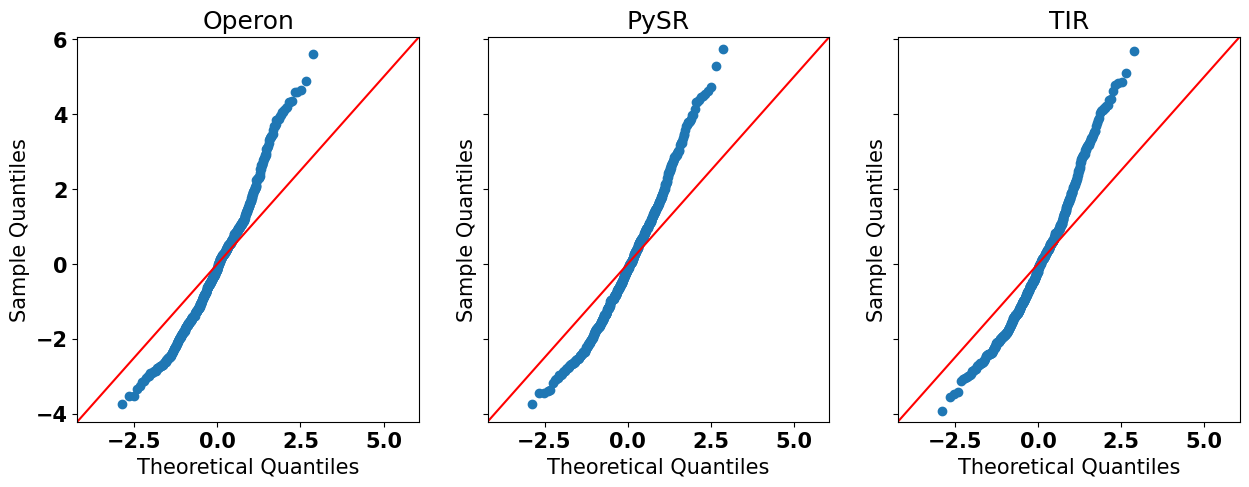

In [57]:
import statsmodels.api as sm 

_,axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

sm.qqplot(reg1.predict(x.reshape(-1,1))[:,0]-y, line ='45', ax=axs[0])
sm.qqplot(reg2.predict(x.reshape(-1,1))-y, line ='45', ax=axs[1])
sm.qqplot(reg3.predict(x.reshape(-1,1))-y, line ='45', ax=axs[2])
axs[0].set_title('Operon')
axs[1].set_title('PySR')
axs[2].set_title('TIR')
plt.savefig("../figs/qq.png", bbox_inches='tight')

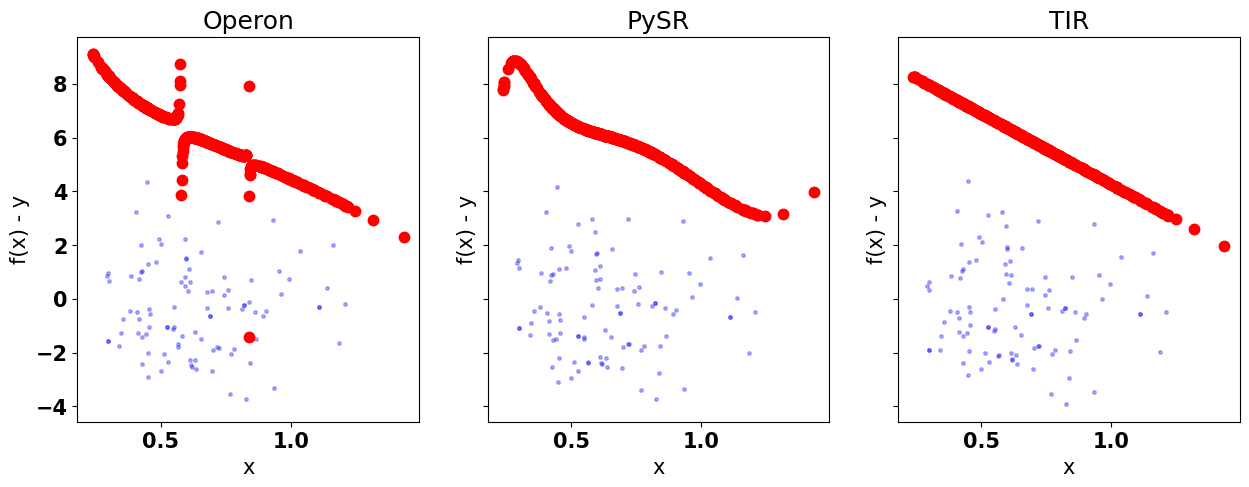

In [58]:
_,axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

ix_sample = np.random.choice(x.shape[0], 100)

axs[0].plot(x[ix_sample], reg1.predict(x[ix_sample].reshape(-1,1))[:,0] - y[ix_sample], '.', color='blue', alpha=0.3, markersize=5)
axs[0].plot(x, reg1.predict(x.reshape(-1,1)), '.', color='red', markersize=15)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x) - y')
axs[0].set_title('Operon')

axs[1].plot(x[ix_sample], reg2.predict(x[ix_sample].reshape(-1,1)) - y[ix_sample], '.', color='blue', alpha=0.3, markersize=5)
axs[1].plot(x, reg2.predict(x.reshape(-1,1)), '.', color='red', markersize=15)
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x) - y')
axs[1].set_title('PySR')

axs[2].plot(x[ix_sample], reg3.predict(x[ix_sample].reshape(-1,1)) - y[ix_sample], '.', color='blue', alpha=0.3, markersize=5)
axs[2].plot(x, reg3.predict(x.reshape(-1,1)), '.', color='red', markersize=15)
axs[2].set_xlabel('x')
axs[2].set_ylabel('f(x) - y')
axs[2].set_title('TIR')
plt.savefig("../figs/residuals.png", bbox_inches='tight')